<a href="https://colab.research.google.com/github/oklawyer71/cyber_security/blob/main/Clustering_exp_Cyber_Security_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing packages

import pandas as pd
from google.colab import files
from google.colab import drive

# Mount drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading in the Datasets - Segmented by Category

df_benign = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features_domain_benign_csv.csv")
df_spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Spam.csv")
df_phishing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_phishing.csv")
df_malware = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Malware.csv")

In [4]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.1 M

In [5]:
# Here we create a variable to use so that we take a subset of 1,000 records for any sample that we use this variable in.

SUBSET_TO_USE=2000

In [6]:
# Sampling the Malware dataset

df_subset_malware = df_malware.sample(SUBSET_TO_USE).sort_index()
df_subset_malware.describe()

,Alexa_Rank,len,obfuscate_at_sign,subdomain,entropy,Page_Rank,oc_8,numeric_percentage,hex_32,dec_8,dec_32,shortened,puny_coded,Name_Server_Count,oc_32,hex_8
count,1.916000e+03,2000.000000,2000.0,2000.000000,2000.000000,988.0,2000.0,2000.000000,2000.0,2000.0,2000.000000,1985.0,2000.000000,1916.000000,2000.000000,2000.0
mean,3.823871e+05,16.232500,0.0,0.416000,2.987845,-1.0,0.0,3.979001,0.0,0.0,0.007000,-1.0,0.001000,3.466597,0.000500,0.0
std,1.674122e+06,9.484378,0.0,0.493017,0.563604,0.0,0.0,8.709244,0.0,0.0,0.083394,0.0,0.031615,3.859603,0.022361,0.0
min,-1.000000e+00,3.000000,0.0,0.000000,0.872181,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.0
25%,-1.000000e+00,10.000000,0.0,0.000000,2.599483,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.000000,2.000000,0.000000,0.0
50%,-1.000000e+00,14.000000,0.0,0.000000,2.989735,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.000000,3.000000,0.000000,0.0
75%,1.529000e+03,20.000000,0.0,1.000000,3.376436,-1.0,0.0,3.053977,0.0,0.0,0.000000,-1.0,0.000000,4.000000,0.000000,0.0
max,1.214644e+07,122.000000,0.0,1.000000,4.766781,-1.0,0.0,57.142857,0.0,0.0,1.000000,-1.0,1.000000,47.000000,1.000000,0.0


In [7]:
# Sampling the Benign dataset

df_subset_benign = df_benign.sample(SUBSET_TO_USE).sort_index()
df_subset_benign.describe()

,subdomain,len,numeric_percentage,entropy,obfuscate_at_sign,dec_8,dec_32,oc_8,oc_32,hex_8,hex_32,puny_coded,shortened,Name_Server_Count,Alexa_Rank,Page_Rank
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.000000,1993.0,1907.000000,1.907000e+03,1185.0
mean,0.411000,10.931000,0.682780,2.525968,0.0,0.0,0.003500,0.0,0.0,0.0,0.0,0.000500,-1.0,4.764027,6.489850e+05,-1.0
std,0.492138,4.477305,3.545901,0.586553,0.0,0.0,0.059072,0.0,0.0,0.0,0.0,0.022361,0.0,7.748669,1.809007e+06,0.0
min,0.000000,1.000000,0.000000,-0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-1.0,0.000000,-1.000000e+00,-1.0
25%,0.000000,8.000000,0.000000,2.154135,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-1.0,2.000000,3.959000e+03,-1.0
50%,0.000000,10.000000,0.000000,2.595489,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-1.0,4.000000,4.567900e+04,-1.0
75%,1.000000,14.000000,0.000000,2.954252,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-1.0,6.000000,2.114035e+05,-1.0
max,1.000000,30.000000,41.666667,3.813826,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,-1.0,218.000000,1.218165e+07,-1.0


In [8]:
# Sampling the Spam dataset

df_subset_spam = df_spam.sample(SUBSET_TO_USE).sort_index()
df_subset_spam.describe()

,oc_8,hex_32,puny_coded,Page_Rank,Alexa_Rank,hex_8,oc_32,len,dec_8,entropy,numeric_percentage,subdomain,dec_32
count,2000.0,2000.0,2000.000000,0.0,1.853000e+03,2000.0,2000.0,2000.000000,2000.0,2000.000000,2000.000000,1996.000000,2000.000000
mean,0.0,0.0,0.050000,NaN,5.811229e+05,0.0,0.0,12.989500,0.0,2.832777,4.816933,0.212425,0.008000
std,0.0,0.0,0.217999,NaN,1.919460e+06,0.0,0.0,4.931384,0.0,0.514924,11.124006,0.409126,0.178751
min,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,5.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,9.000000,0.0,2.588491,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,12.000000,0.0,2.963120,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,16.000000,0.0,3.196105,0.000000,0.000000,0.000000
max,0.0,0.0,1.000000,NaN,9.310717e+06,0.0,0.0,32.000000,0.0,3.979059,53.846154,1.000000,4.000000


In [9]:
# Sampling the Phishing dataset

df_subset_phishing = df_phishing.sample(SUBSET_TO_USE).sort_index()
df_subset_phishing.describe()

,dec_8,Page_Rank,Alexa_Rank,shortened,dec_32,hex_32,subdomain,hex_8,oc_8,oc_32,Name_Server_Count,puny_coded,entropy,len,obfuscate_at_sign,numeric_percentage
count,2000.0,1842.0,1.842000e+03,1988.0,2000.000000,2000.0,2000.000000,2000.0,2000.0,2000.0,1842.000000,2000.0,2000.000000,2000.000000,2000.0,2000.000000
mean,0.0,-1.0,9.345787e+05,-1.0,0.006000,0.0,0.599500,0.0,0.0,0.0,5.302932,0.0,2.914913,15.858000,0.0,2.735747
std,0.0,0.0,2.449092e+06,0.0,0.077246,0.0,0.490122,0.0,0.0,0.0,5.394435,0.0,0.595343,8.437383,0.0,8.432124
min,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.500000,2.000000,0.0,0.000000
25%,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2.000000,0.0,2.619549,11.000000,0.0,0.000000
50%,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,1.000000,0.0,0.0,0.0,4.000000,0.0,2.900982,13.000000,0.0,0.000000
75%,0.0,-1.0,5.669050e+04,-1.0,0.000000,0.0,1.000000,0.0,0.0,0.0,7.000000,0.0,3.313312,19.000000,0.0,0.000000
max,0.0,-1.0,1.214808e+07,-1.0,1.000000,0.0,1.000000,0.0,0.0,0.0,55.000000,0.0,4.573895,70.000000,0.0,64.705882


In [10]:
# Adding a Category label to each (will not be used for our unsupervised learning, but is here to keep track)

df_subset_benign['category'] = 'benign'
df_subset_spam['category'] = 'spam'
df_subset_phishing['category'] = 'phishing'
df_subset_malware['category'] = 'malware'


In [11]:
# Combining datasets

df_lst = [df_subset_benign, df_subset_spam, df_subset_phishing, df_subset_malware]
df_comp = pd.concat(df_lst)

In [12]:
# Double Check that we have subsetted the data properly and have 1,000 records of each category

df_comp[['category']].describe()

,category
count,8000
unique,4
top,benign
freq,2000


In [13]:
# Double Check that we have subsetted the data properly and have 1,000 records of each category

freq_table = pd.Series(df_comp['category']).value_counts()
print(freq_table)

benign      2000
spam        2000
phishing    2000
malware     2000
Name: category, dtype: int64


In [14]:
# Checking the pivot of the country codes and category

pd.crosstab(df_comp.Country, df_comp.category, margins=True, normalize='index')

category,benign,malware,phishing,spam
Country,,,,
AE,0.000000,0.666667,0.333333,0.000000
AF,0.000000,0.500000,0.500000,0.000000
AL,0.000000,0.000000,1.000000,0.000000
AO,0.000000,0.000000,1.000000,0.000000
AR,0.000000,0.833333,0.166667,0.000000
...,...,...,...,...
eg,0.000000,1.000000,0.000000,0.000000
fr,0.500000,0.000000,0.500000,0.000000
im,0.000000,1.000000,0.000000,0.000000


In [15]:
# Grouping the numeric values by category

df_comp.groupby('category').mean().T

<ipython-input-15-12bc6a1e9844>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comp.groupby('category').mean().T


category,benign,malware,phishing,spam
subdomain,0.411000,0.416000,0.599500,0.212425
len,10.931000,16.232500,15.858000,12.989500
numeric_percentage,0.682780,3.979001,2.735747,4.816933
entropy,2.525968,2.987845,2.914913,2.832777
dec_8,0.000000,0.000000,0.000000,0.000000
dec_32,0.003500,0.007000,0.006000,0.008000
oc_8,0.000000,0.000000,0.000000,0.000000
oc_32,0.000000,0.000500,0.000000,0.000000
hex_8,0.000000,0.000000,0.000000,0.000000
hex_32,0.000000,0.000000,0.000000,0.000000


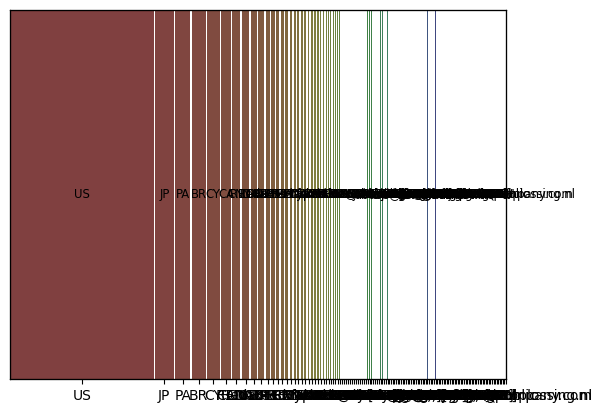

In [16]:
# Checking out the frequency via the mosaic plot

import statsmodels.graphics.mosaicplot as mp
freq_table = pd.Series(df_comp['Country']).value_counts()
mp.mosaic(freq_table);

Update Domain Age to numeric.

In [17]:
# As we can see here, domain is not a numeric value

df_comp['Domain_Age'].head()

4     8258 days, 10:17:38.661856
7     8258 days, 10:20:05.941768
11    5378 days, 10:09:41.956926
20    6213 days, 23:46:50.246057
27     5634 days, 1:55:03.634245
Name: Domain_Age, dtype: object

In [18]:
# Creating a function

def domain_age_num(domain_age):
   age = re.search('[0-9]+', domain_age).group()
   return age

In [19]:
df_comp['Domain_Age_num'] = df_comp['Domain_Age']

In [20]:
df_comp['Domain_Age_num'].isnull().sum()

482

Convert the Domain age from string to an integer

In [21]:
import re
df_comp['Domain_Age_num'] = df_comp['Domain_Age_num'].fillna("10000")
df_comp['Domain_Age_num'] = df_comp['Domain_Age_num'].apply(domain_age_num)
df_comp['Domain_Age_num'].head()
df_comp['Domain_Age_num'] = pd.to_numeric(df_comp['Domain_Age_num'], errors='coerce')

array([[<Axes: title={'center': 'Domain_Age_num'}>]], dtype=object)

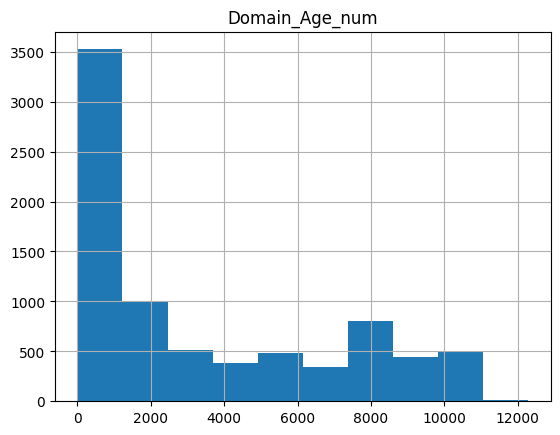

In [22]:
df_comp.hist(column='Domain_Age_num')

convert country to numeric code

In [23]:
# Country is a string, so we need to convert this to numeric, using the factorize function

df_comp['Country_Codes'] = pd.factorize(df_comp['Country'])[0]

```
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Alexa_Rank               8460 non-null   float64
 1   Country                  5969 non-null   object
 2   distance_from_bad_words  8871 non-null   object



 3   len                      8871 non-null   int64  
 4   obfuscate_at_sign        8871 non-null   int64  
 5   subdomain                8871 non-null   int64  
 6   1gram                    8871 non-null   object
 7   entropy                  8871 non-null   float64
 8   longest_word             8871 non-null   object
 9   Page_Rank                4470 non-null   float64
 10  oc_8                     8871 non-null   int64  
 11  numeric_percentage       8871 non-null   float64
 12  2gram                    8871 non-null   object
 13  Registrant_Name          276 non-null    object
 14  Domain_Name              7727 non-null   object
 15  Domain_Age               8460 non-null   object
 16  hex_32                   8871 non-null   int64  
 17  dec_8                    8871 non-null   int64  
 18  3gram                    8871 non-null   object
 19  dec_32                   8871 non-null   int64  
 20  shortened                8810 non-null   float64
 21  sld                      8871 non-null   object
 22  tld                      8871 non-null   object
 23  Creation_Date_Time       7325 non-null   object
 24  puny_coded               8871 non-null   int64  
 25  char_distribution        8871 non-null   object
 26  Registrar                7219 non-null   object
 27  Name_Server_Count        8460 non-null   float64
 28  State                    5412 non-null   object
 29  typos                    8871 non-null   object
 30  Emails                   6639 non-null   object
 31  oc_32                    8871 non-null   int64  
 32  hex_8                    8871 non-null   int64  
 33  Organization             4866 non-null   object
 ```

In [24]:
# Resulting country numeric distribution

df_comp['Country_Codes'].describe()

count    8000.000000
mean        9.032125
std        19.717776
min        -1.000000
25%        -1.000000
50%         0.000000
75%        13.000000
max       131.000000
Name: Country_Codes, dtype: float64

Change the email field to first email and encode it to numeric

In [25]:
# Selecting only the first email, encoding to numeric

df_comp['Emails'].head()

4     ['abusecomplaints@registrarsafe.com', 'domain@...
7     ['abusecomplaints@registrarsafe.com', 'domain@...
11    ['abusecomplaints@markmonitor.com', 'whoisrequ...
20    ['abusecomplaints@markmonitor.com', 'whoisrequ...
27    ['abusecomplaints@registrarsafe.com', 'domain@...
Name: Emails, dtype: object

In [26]:
def get_first_email(email_list):
    for first in email_list.split(','):
      return first

df_comp['Emails'] = df_comp['Emails'].fillna("unknown@gmail.com")
df_comp['Emails_first'] = df_comp['Emails'].apply(get_first_email)
df_comp['Emails_first'].head(10)
df_comp['Emails_first'] = pd.factorize(df_comp['Emails_first'])[0]
df_comp['Emails_first'].describe()

count    8000.000000
mean       62.923375
std        94.675935
min         0.000000
25%         3.000000
50%        18.000000
75%        78.000000
max       492.000000
Name: Emails_first, dtype: float64

Change the distance from bad words to numeric.

In [27]:
def get_numeric_distance(distance_bad):
    dist_val = eval(distance_bad)
    return sum(dist_val.values())

df_comp['distance_from_bad_words'].head()
df_comp['distance_bad_numeric'] = df_comp['distance_from_bad_words'].apply(get_numeric_distance)
df_comp['distance_bad_numeric'].describe()

count    8000.000000
mean       20.067361
std        15.137980
min         0.000000
25%        10.795455
50%        15.918561
75%        22.353693
max       117.676136
Name: distance_bad_numeric, dtype: float64

Change Domain name to first domain name

In [28]:
import ast
def get_first_domain_name(domain_name):
    domain_name_val = ""
    try:
        domain_name_val = ast.literal_eval(domain_name)
        return domain_name_val[0]
    except (ValueError, SyntaxError):
      return domain_name_val


df_comp['Domain_Name'] = df_comp['Domain_Name'].fillna("unknown@unknown.com")
df_comp['Domain_Name_first'] = df_comp['Domain_Name'].apply(get_first_domain_name)
df_comp['Domain_Name_first'].head(10)
df_comp['Domain_Name_first'] = pd.factorize(df_comp['Domain_Name_first'])[0]
df_comp['Domain_Name_first'].describe()

count    8000.000000
mean      287.988125
std       443.168566
min         0.000000
25%         0.000000
50%         0.000000
75%       655.000000
max      1639.000000
Name: Domain_Name_first, dtype: float64

Convert TLD to numeric codes

In [29]:
df_comp['tld_codes'] = pd.factorize(df_comp['tld'])[0]
df_comp['tld_codes'].describe()

count    8000.00000
mean       25.04025
std        50.01960
min        -1.00000
25%         0.00000
50%         0.00000
75%        18.00000
max       242.00000
Name: tld_codes, dtype: float64

Convert SLD to numeric codes

In [30]:
df_comp['sld_codes'] = pd.factorize(df_comp['sld'])[0]
df_comp['sld_codes'].describe()

count    8000.000000
mean     1967.630625
std      1188.276326
min        -1.000000
25%      1159.750000
50%      1871.000000
75%      2758.250000
max      4446.000000
Name: sld_codes, dtype: float64

In [31]:
#Gather features to run algorithm on

df_ml_algo = df_comp[['Alexa_Rank','Country_Codes', 'len', 'obfuscate_at_sign', 'subdomain', 'tld_codes', 'sld_codes', 'entropy', 'Page_Rank',
                      'numeric_percentage', 'Registrant_Name', 'Domain_Name_first', 'Domain_Age_num', 'shortened', 'puny_coded' ,
                      'Name_Server_Count', 'Emails_first', 'distance_bad_numeric', 'category']]

# 'Registrant_Name', , 'category'

In [32]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [33]:
gpu_available=False
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  gpu_available=False
  print('Not connected to a GPU')
else:
  gpu_available=True
  print(gpu_info)


Mon Oct 30 02:40:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
import pycaret

In [35]:
# Check to see if GPU is available for us to use through Colab

gpu_available

True

In [36]:
# This step has code ready if we wanted to compare to another model

df_ml_algo_train = df_ml_algo.sample(frac=1.0, random_state=25)
# df_ml_algo_test = df_ml_algo.drop(df_ml_algo_train.index)

# print(f"No. of training examples: {df_ml_algo_train.shape[0]}")
# print(f"No. of testing examples: {df_ml_algo_test.shape[0]}")

In [37]:
from pycaret.clustering import *
s = setup(df_ml_algo_train, session_id = 123, index=False, use_gpu=gpu_available, ignore_features='category')

,Description,Value
0,Session id,123
1,Original data shape,"(8000, 19)"
2,Transformed data shape,"(8000, 198)"
3,Ignore features,8
4,Numeric features,14
5,Categorical features,4
6,Rows with missing values,98.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [38]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [39]:
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [40]:
# init setup on exp
exp.setup(df_ml_algo_train, session_id = 123, index=False, use_gpu=gpu_available, ignore_features='category')

,Description,Value
0,Session id,123
1,Original data shape,"(8000, 19)"
2,Transformed data shape,"(8000, 198)"
3,Ignore features,8
4,Numeric features,14
5,Categorical features,4
6,Rows with missing values,98.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [41]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [42]:
model = create_model("kmeans", num_clusters= 4)
evaluate_model(model)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9073,74632.6626,0.4152,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [43]:
assign_model(model)

,Alexa_Rank,Country_Codes,len,obfuscate_at_sign,subdomain,tld_codes,sld_codes,entropy,Page_Rank,numeric_percentage,Registrant_Name,Domain_Name_first,Domain_Age_num,shortened,puny_coded,Name_Server_Count,Emails_first,distance_bad_numeric,Cluster
0,-1.0,-1,25,0,1.0,34,2353,3.467906,-1.0,0.0,NaN,0,0,-1.0,0,0.0,3,21.732954,Cluster 0
1,-1.0,24,6,0,0.0,56,997,2.154135,-1.0,0.0,NaN,0,378,-1.0,0,2.0,38,10.672348,Cluster 0
2,8472.0,-1,5,0,0.0,30,2756,1.857543,-1.0,0.0,NaN,0,8029,-1.0,0,0.0,3,5.113636,Cluster 0
3,13164.0,0,17,0,1.0,0,358,3.214383,NaN,0.0,NaN,177,8458,-1.0,0,12.0,1,12.757576,Cluster 0
4,NaN,-1,9,0,0.0,0,3307,2.151044,NaN,0.0,NaN,0,10000,-1.0,0,NaN,3,21.696970,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.0,0,21,0,0.0,0,4123,3.118182,-1.0,0.0,NaN,1534,91,-1.0,0,4.0,67,20.140152,Cluster 0
7996,-1.0,-1,15,0,0.0,141,1844,3.379765,NaN,12.0,NaN,0,0,-1,1,0,3,61.702652,Cluster 0
7997,-1.0,-1,11,0,0.0,10,3471,2.781301,NaN,0.0,NaN,0,0,-1.0,0,0.0,3,16.106060,Cluster 0
7998,6865.0,-1,4,0,0.0,7,248,1.500000,NaN,0.0,NaN,0,0,-1.0,0,0.0,74,5.518939,Cluster 0


In [44]:
save_model(model, 'kmeans_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Alexa_Rank', 'Country_Codes',
                                              'len', 'subdomain', 'tld_codes',
                                              'sld_codes', 'entropy',
                                              'Page_Rank', 'numeric_percentage',
                                              'Domain_Name_first',
                                              'Domain_Age_num', 'puny_coded',
                                              'Emails_first',
                                              'distance_bad_numeric'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['obfuscate_at_sign',
                            